In [45]:
import numpy as np
import pandas as pd
import random
from scipy import stats
from statsmodels.stats.weightstats import ztest
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

import scipy
import statistics


%matplotlib inline
sns.set(rc={'figure.figsize':(13, 7.5)})
sns.set_context('talk')
warnings.filterwarnings('ignore')

In [46]:
df = pd.read_csv('Inc_Exp_Data.csv')
df.sample(10)

# Thu nhập hàng tháng
# Chi phí hằng tháng
# Số thành viên
# Tiền thuê hằng tháng
# Thu nhập hằng năm
# Trình độ học vấn cao nhất
# Số người kiếm tiền

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,Highest_Qualified_Member,No_of_Earning_Members
32,45000,10000,2,1000,437400,Post-Graduate,1
41,65000,20000,4,5000,647400,Illiterate,2
8,19000,9000,2,0,218880,Under-Graduate,1
34,46000,25000,5,3500,596160,Graduate,1
44,85000,25000,5,0,1142400,Under-Graduate,2
20,30500,25000,5,5000,351360,Under-Graduate,1
5,14000,8000,2,0,196560,Graduate,1
6,15000,16000,3,35000,167400,Post-Graduate,1
25,35000,25000,4,0,449400,Professional,2
15,25000,12300,3,0,246000,Graduate,1


# Data Information 

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Mthly_HH_Income           50 non-null     int64 
 1   Mthly_HH_Expense          50 non-null     int64 
 2   No_of_Fly_Members         50 non-null     int64 
 3   Emi_or_Rent_Amt           50 non-null     int64 
 4   Annual_HH_Income          50 non-null     int64 
 5   Highest_Qualified_Member  50 non-null     object
 6   No_of_Earning_Members     50 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 2.9+ KB


In [48]:
df.shape

(50, 7)

In [49]:
# kiểm tra giá trị trong bảng 
df.isna().any()

Mthly_HH_Income             False
Mthly_HH_Expense            False
No_of_Fly_Members           False
Emi_or_Rent_Amt             False
Annual_HH_Income            False
Highest_Qualified_Member    False
No_of_Earning_Members       False
dtype: bool

# The Distribution

In [50]:
def result(p):
    df2 = pd.DataFrame(p, index=[''])
    return df2[p]

In [51]:
# Bảng trung bình thu nhập hàng tháng, chi phí hàng tháng, thu nhập hàng năm
a = {}
a['Class'] = 'Value'
for i in ['Mthly_HH_Income','Mthly_HH_Expense','Annual_HH_Income']:
    a[i+'_mean'] = df[i].mean()

result(a)

,Class,Mthly_HH_Income_mean,Mthly_HH_Expense_mean,Annual_HH_Income_mean
,Value,41558.0,18818.0,490019.04


In [52]:
money = (df['Mthly_HH_Income'] - df['Mthly_HH_Expense'])

In [53]:
Type = []
for i in money:
    if i <= 2000 : Type.append('Poor')
    elif i <= 40000 : Type.append('Normal')
    else : Type.append('Rich')
df.insert(7,"Money",money)
df.insert(8,"Type",Type)

In [54]:
df.sample(20)

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,Highest_Qualified_Member,No_of_Earning_Members,Money,Type
27,40000,10000,4,0,412800,Under-Graduate,1,30000,Normal
17,25000,10000,6,0,258000,Under-Graduate,3,15000,Normal
10,20000,18000,4,8000,278400,Under-Graduate,2,2000,Poor
37,50500,20000,3,0,581760,Professional,2,30500,Normal
16,25000,20000,3,3500,261000,Graduate,1,5000,Normal
39,60000,10000,3,0,590400,Post-Graduate,1,50000,Rich
36,50000,20000,4,0,570000,Professional,1,30000,Normal
22,34000,19000,6,0,330480,Professional,1,15000,Normal
46,98000,25000,5,0,1152480,Professional,2,73000,Rich
14,24000,10000,4,0,244800,Graduate,2,14000,Normal


In [55]:
x = df.groupby('Type')['Type'].count()
x = pd.DataFrame(x)
x.columns = ['Percent']
type_inc = x/sum(x['Percent'])*100
type_inc

,Percent
Type,
Normal,66.0
Poor,14.0
Rich,20.0


Text(0, 0.5, 'Type')

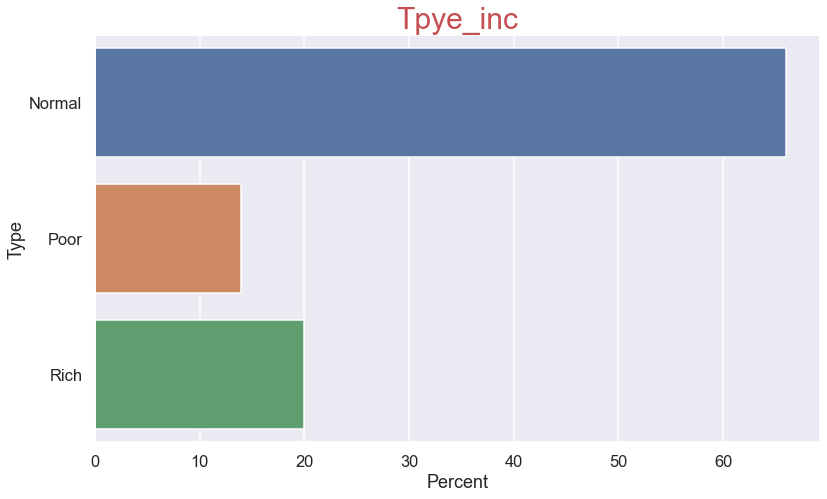

In [56]:
type_inc.reset_index(inplace= True)
sns.barplot(y='Type',x='Percent',data = type_inc, orient = 'h')
plt.title('Tpye_inc', color = 'r', fontsize = 30)
plt.ylabel('Type')

In [57]:
# Statistical table of monthly rent percentage

x = pd.DataFrame(df.groupby('Emi_or_Rent_Amt')['Emi_or_Rent_Amt'].count())
x.columns = ['Percent']
x.index.names = ['Count']
amt = x/sum(x['Percent'])*100
amt.T

Count,0,1000,2000,2500,3000,3500,4000,5000,8000,10000,12000,20000,35000
Percent,60.0,2.0,4.0,2.0,4.0,6.0,2.0,4.0,4.0,4.0,4.0,2.0,2.0


Text(0, 0.5, 'Percent')

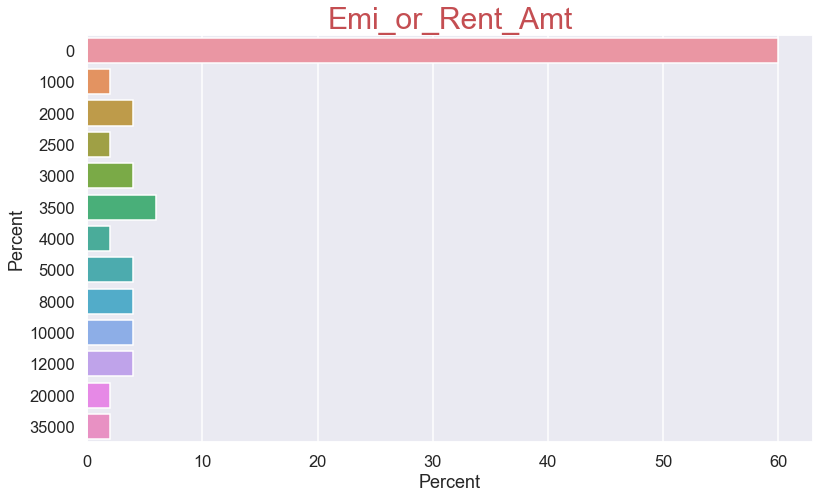

In [58]:
amt.reset_index(inplace= True)
sns.barplot(y='Count',x='Percent',data = amt, orient = 'h')
plt.title('Emi_or_Rent_Amt', color = 'r', fontsize = 30)
plt.ylabel('Percent')

In [59]:
# Bảng thống kê phần trăm về học vấn

x = df.groupby('Highest_Qualified_Member')['Highest_Qualified_Member'].count()
x = pd.DataFrame(x)
x.columns = ['Percent']
qualified = x/sum(x['Percent'])*100
qualified

,Percent
Highest_Qualified_Member,
Graduate,38.0
Illiterate,10.0
Post-Graduate,12.0
Professional,20.0
Under-Graduate,20.0


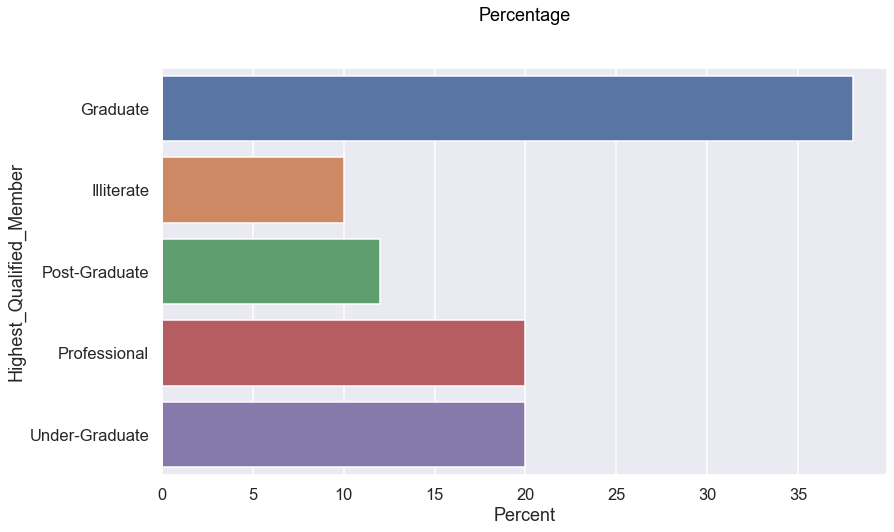

In [60]:
qualified.reset_index(inplace=True)

sns.barplot(x='Percent',y='Highest_Qualified_Member',data = qualified)
plt.title('Percentage', color = 'black', y = 1.1, fontsize = 18)
plt.show()

# The Central Tendency

In [61]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Mthly_HH_Income,50.0,41558.00,26097.908979,5000.0,23550.0,35000.0,50375.0,100000.0
Mthly_HH_Expense,50.0,18818.00,12090.216824,2000.0,10000.0,15500.0,25000.0,50000.0
No_of_Fly_Members,50.0,4.06,1.517382,1.0,3.0,4.0,5.0,7.0
Emi_or_Rent_Amt,50.0,3060.00,6241.434948,0.0,0.0,0.0,3500.0,35000.0
Annual_HH_Income,50.0,490019.04,320135.792123,64200.0,258750.0,447420.0,594720.0,1404000.0
No_of_Earning_Members,50.0,1.46,0.734291,1.0,1.0,1.0,2.0,4.0
Money,50.0,22740.00,20434.804244,-3000.0,8250.0,17000.0,31000.0,73000.0


In [62]:
# Mode value

print('Mode value of dataset:')
df.mode().T

Mode value of dataset:


,0
Mthly_HH_Income,45000
Mthly_HH_Expense,25000
No_of_Fly_Members,4
Emi_or_Rent_Amt,0
Annual_HH_Income,590400
Highest_Qualified_Member,Graduate
No_of_Earning_Members,1
Money,10000
Type,Normal


In [63]:
# var value

print('Varian value of dataset:')
pd.DataFrame(df.var())

Varian value of dataset:


,0
Mthly_HH_Income,6.811009e+08
Mthly_HH_Expense,1.461733e+08
No_of_Fly_Members,2.302449e+00
Emi_or_Rent_Amt,3.895551e+07
Annual_HH_Income,1.024869e+11
No_of_Earning_Members,5.391837e-01
Money,4.175812e+08


In [64]:
print('Table of values showing dependencies :')
data_corr = df.corr()
data_corr

Table of values showing dependencies :


,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,No_of_Earning_Members,Money
Mthly_HH_Income,1.000000,0.649215,0.448317,0.036976,0.970315,0.347883,0.893023
Mthly_HH_Expense,0.649215,1.000000,0.639702,0.405280,0.591222,0.311915,0.237484
No_of_Fly_Members,0.448317,0.639702,1.000000,0.085808,0.430868,0.597482,0.194081
Emi_or_Rent_Amt,0.036976,0.405280,0.085808,1.000000,0.002716,-0.097431,-0.192560
Annual_HH_Income,0.970315,0.591222,0.430868,0.002716,1.000000,0.296679,0.889424
No_of_Earning_Members,0.347883,0.311915,0.597482,-0.097431,0.296679,1.000000,0.259748
Money,0.893023,0.237484,0.194081,-0.192560,0.889424,0.259748,1.000000


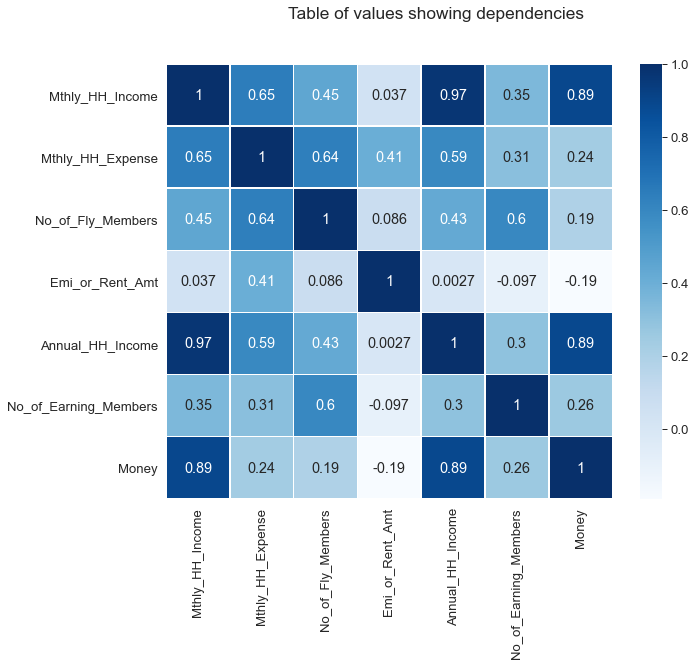

In [65]:
plt.figure(figsize=(10,8))
sns.set_context('paper', font_scale=1.5)
plt.suptitle('Table of values showing dependencies')
sns.heatmap(data_corr, annot=True, cmap='Blues',  linewidths=0.5, linecolor='white') #

# Data Visualization

Text(0.5, 1.0, 'All data')

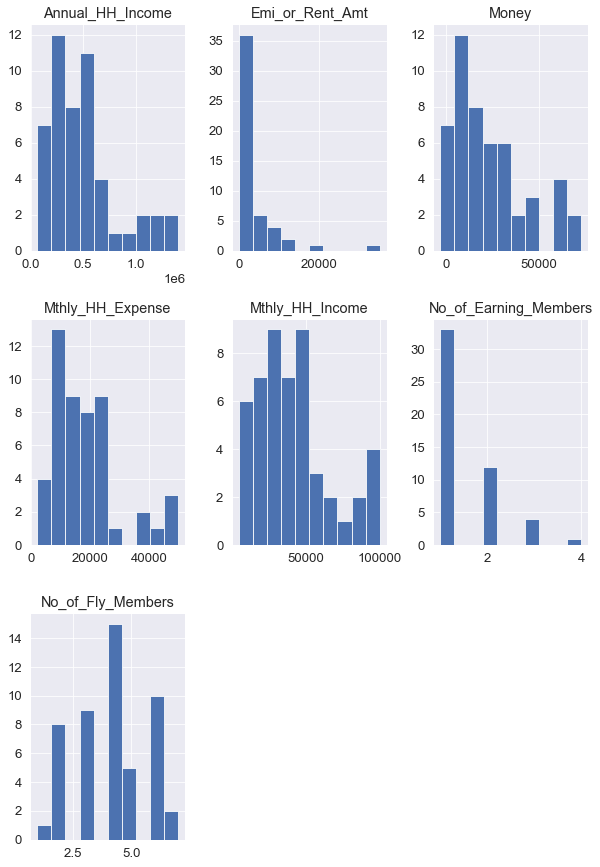

In [66]:
df.hist(figsize=(10,15))
plt.title('All data', color = 'r')

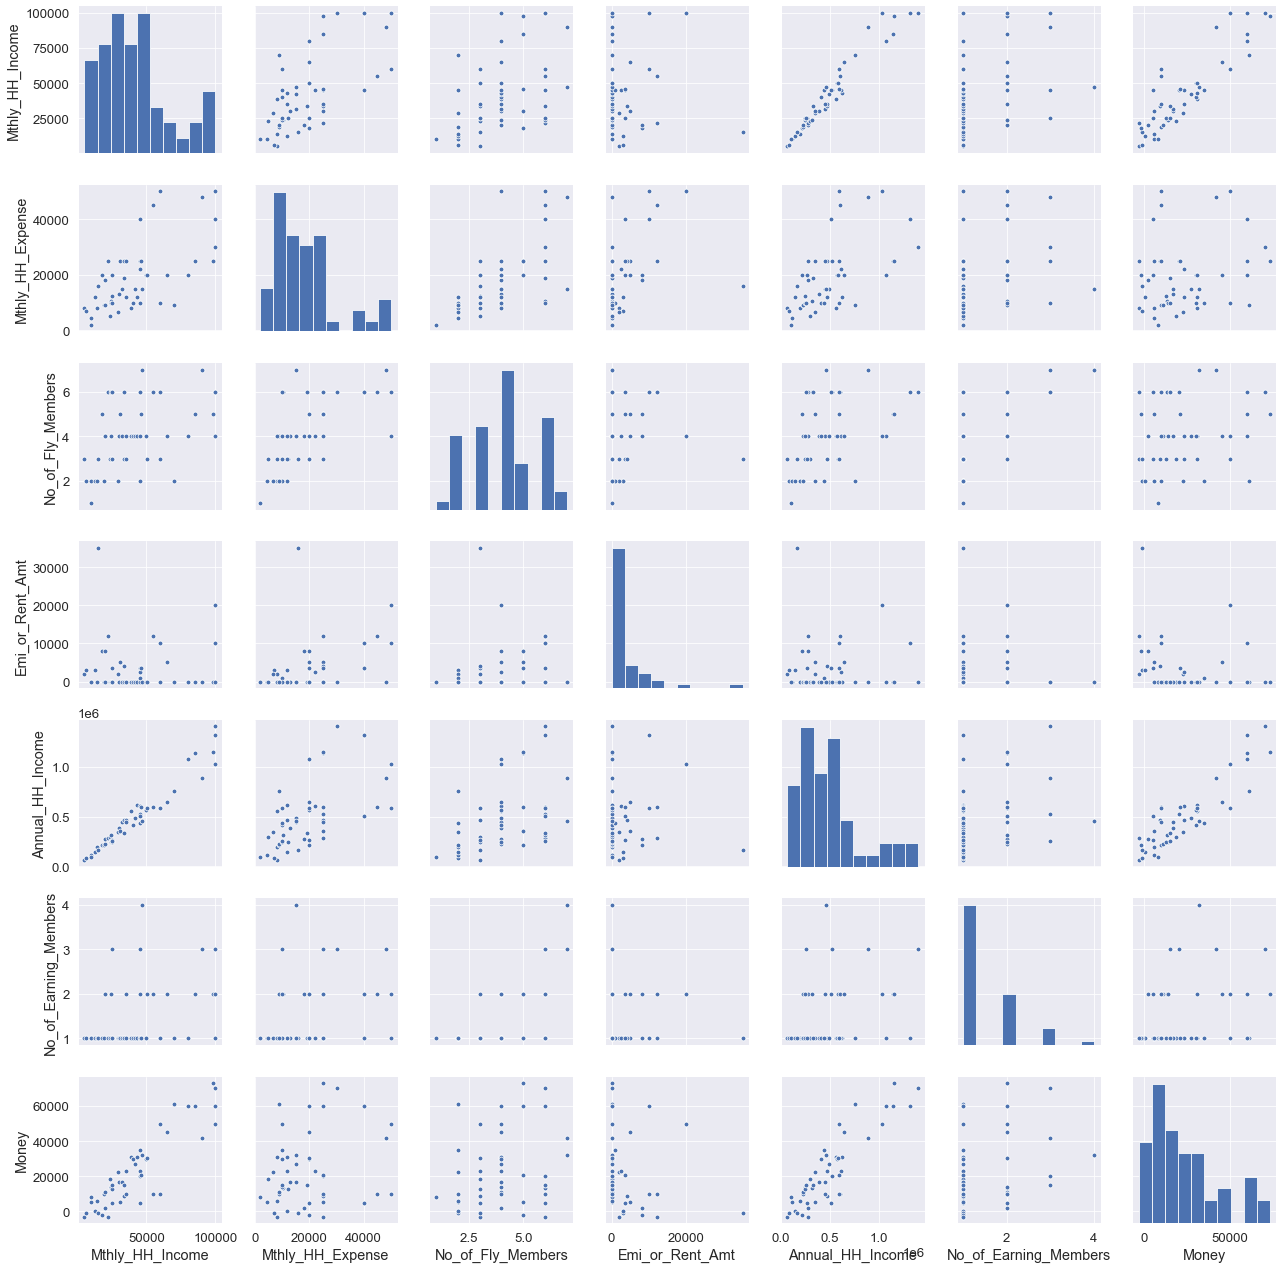

In [67]:
sns.pairplot(data = df)

Text(0.5, 0.98, 'Income And Expense')

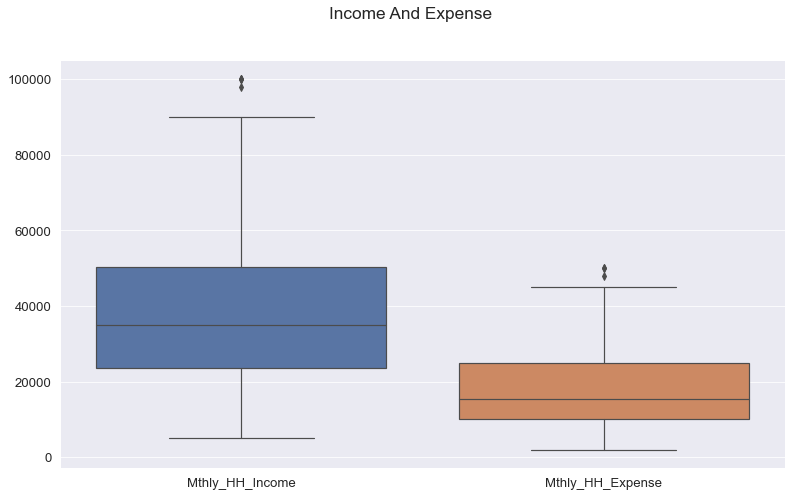

In [68]:
df1 = ['Mthly_HH_Income','Mthly_HH_Expense']
data = df[df1]
sns.boxplot(data=data)
plt.suptitle('Income And Expense')

Text(0.5, 0.98, 'Qualified and spending plan')

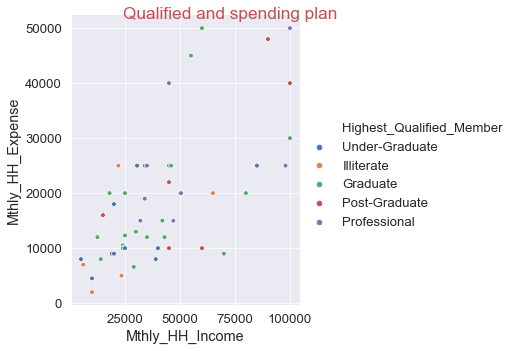

In [69]:
sns.relplot(data=data, x="Mthly_HH_Income", y="Mthly_HH_Expense", hue=df['Highest_Qualified_Member'],kind='scatter')
plt.suptitle('Qualified and spending plan', color = 'r')